<a href="https://colab.research.google.com/github/prototype99/data-science-webinars/blob/main/pods_2223_w4_webinar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', context='talk', font_scale=0.8)

In [ ]:
gfmt = pd.read_csv('https://raw.githubusercontent.com/gerberl/6G7V0026-2223/main/datasets/gfmt_sleep.csv')

In [ ]:
gfmt.head(1)

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence when incorrect hit,confidence when correct reject,confidence when incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess
0,8,f,39,65,80,72.5,91.0,90,93.0,83.5,93.0,90,9,13,2


In [ ]:
# pre-processing steps
# discard some columns not of interest for this current analysis
# remove noise day (in all cases, '*' for missing values for quantitative feature)
# convert columns that were incorrecly defined as `object` (e.g., strings)
# to quantitative data types (i.e., float)

In [ ]:
gfmt.columns

Index(['participant number', 'gender', 'age', 'correct hit percentage',
       'correct reject percentage', 'percent correct',
       'confidence when correct hit', 'confidence when incorrect hit',
       'confidence when correct reject', 'confidence when incorrect reject',
       'confidence when correct', 'confidence when incorrect', 'sci', 'psqi',
       'ess'],
      dtype='object')

In [ ]:
# first pre-processing step
# use participant numbers as row label (not useful for anaysis apart from
# identifying participants uniquely)
# drop columns not of interest for our data science tasks in this notebook
# rename columns - don't like the long names
gfmt = (
    gfmt
    .set_index('participant number')
    .drop(columns=['gender', 'age'])
    .set_axis([
        'correct_hit', 'correct_rjct_perc', 'correct_perc', 'conf_correct_hit', 
        'conf_incorr_hit', 'conf_corr_rjct_', 'conf_incorr_rjct', 
        'conf_correct', 'conf_incorr', 'sci', 'psqi', 'ess'
    ], axis='columns')   
)

In [ ]:
gfmt.head(1)

,correct_hit,correct_rjct_perc,correct_perc,conf_correct_hit,conf_incorr_hit,conf_corr_rjct_,conf_incorr_rjct,conf_correct,conf_incorr,sci,psqi,ess
participant number,,,,,,,,,,,,
8,65,80,72.5,91.0,90,93.0,83.5,93.0,90,9,13,2


In [ ]:
gfmt.loc[:, 'correct_perc':'conf_incorr'] = (
    gfmt.loc[:, 'correct_perc':'conf_incorr']
    .replace('*', np.nan)
    .astype(float)
)

In [ ]:
gfmt.head(1)

,correct_hit,correct_rjct_perc,correct_perc,conf_correct_hit,conf_incorr_hit,conf_corr_rjct_,conf_incorr_rjct,conf_correct,conf_incorr,sci,psqi,ess
participant number,,,,,,,,,,,,
8,65,80,72.5,91.0,90.0,93.0,83.5,93.0,90.0,9,13,2


In [ ]:
gfmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 8 to 103
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   correct_hit        102 non-null    int64  
 1   correct_rjct_perc  102 non-null    int64  
 2   correct_perc       102 non-null    float64
 3   conf_correct_hit   102 non-null    float64
 4   conf_incorr_hit    84 non-null     float64
 5   conf_corr_rjct_    102 non-null    float64
 6   conf_incorr_rjct   93 non-null     float64
 7   conf_correct       102 non-null    float64
 8   conf_incorr        99 non-null     float64
 9   sci                102 non-null    int64  
 10  psqi               102 non-null    int64  
 11  ess                102 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 10.4 KB


In [ ]:
gfmt.head()

,correct_hit,correct_rjct_perc,correct_perc,conf_correct_hit,conf_incorr_hit,conf_corr_rjct_,conf_incorr_rjct,conf_correct,conf_incorr,sci,psqi,ess
participant number,,,,,,,,,,,,
8,65,80,72.5,91.0,90.0,93.0,83.5,93.0,90.0,9,13,2
16,90,90,90.0,75.5,55.5,70.5,50.0,75.0,50.0,4,11,7
18,90,95,92.5,89.5,90.0,86.0,81.0,89.0,88.0,10,9,3
22,100,75,87.5,89.5,NaN,71.0,80.0,88.0,80.0,13,8,20
27,60,65,62.5,68.5,49.0,61.0,49.0,65.0,49.0,13,9,12


In [ ]:
# creating the sleeper groups based on the threshold of 16 on `sci` as discussed
# in the paper...
gfmt['sleeper_group'] = gfmt['sci']<=16
gfmt['sleeper_group'] = gfmt['sleeper_group'].map({ True: 'insomniac', False: 'normal sleeper' })

In [ ]:
gfmt.head(1)

,correct_hit,correct_rjct_perc,correct_perc,conf_correct_hit,conf_incorr_hit,conf_corr_rjct_,conf_incorr_rjct,conf_correct,conf_incorr,sci,psqi,ess,sleeper_group
participant number,,,,,,,,,,,,,
8,65,80,72.5,91.0,90.0,93.0,83.5,93.0,90.0,9,13,2,insomniac


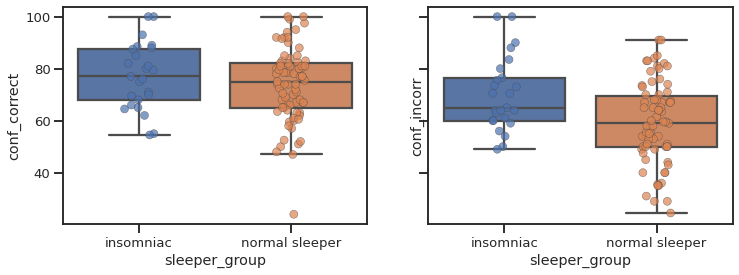

In [ ]:
# any visible/possibly signficant difference in sleeper groups wrt 
# confidence-in-performance metrics?
fig, axs = plt.subplots(1, 2, figsize=(12,4), sharex=True, sharey=True)

sns.boxplot(data=gfmt, x='sleeper_group', y='conf_correct', showfliers=False, ax=axs[0])
sns.stripplot(data=gfmt, x='sleeper_group', y='conf_correct', ax=axs[0],
              linewidth=0.5, jitter=0.1, size=8, alpha=0.7)

sns.boxplot(data=gfmt, x='sleeper_group', y='conf_incorr', showfliers=False, ax=axs[1])
sns.stripplot(data=gfmt, x='sleeper_group', y='conf_incorr', ax=axs[1],
              linewidth=0.5, jitter=0.1, size=8, alpha=0.7);

In [ ]:
conf_incorr_insomniac = gfmt.query("sleeper_group=='insomniac'")['conf_incorr']
conf_incorr_normal = gfmt.query("sleeper_group=='normal sleeper'")['conf_incorr']

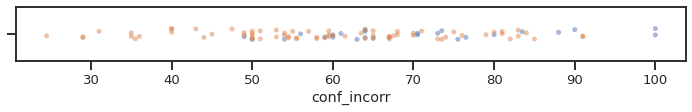

In [ ]:
fig, ax = plt.subplots(figsize=(12,1))
sns.stripplot(
    x=conf_incorr_insomniac, 
    jitter=0.1, alpha=0.5, ax=ax, color='C0'
)
sns.stripplot(
    x=conf_incorr_normal, 
    jitter=0.1, alpha=0.5, ax=ax, color='C1'
);

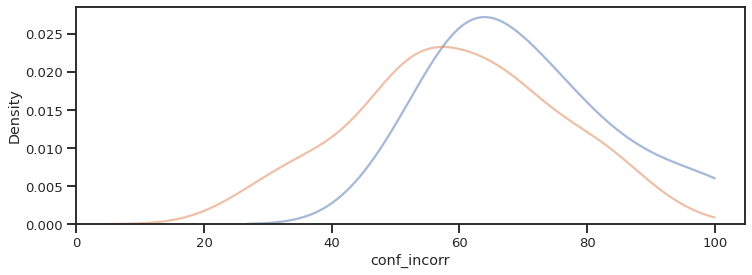

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
sns.kdeplot(x=conf_incorr_insomniac, alpha=0.5, ax=ax, color='C0', clip=(0,100))
sns.kdeplot(x=conf_incorr_normal, alpha=0.5, ax=ax, color='C1', clip=(0,100));

In [ ]:
conf_corr_insomniac = gfmt.query("sleeper_group=='insomniac'")['conf_correct']
conf_corr_normal = gfmt.query("sleeper_group=='normal sleeper'")['conf_correct']

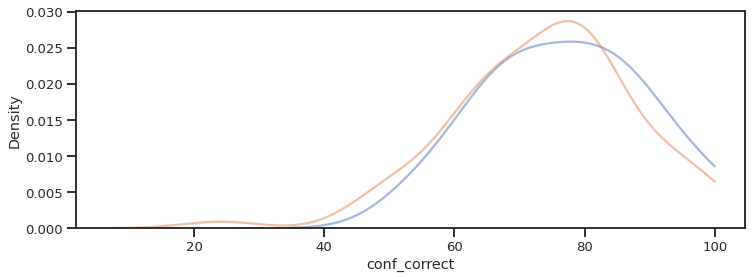

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
sns.kdeplot(x=conf_corr_insomniac, alpha=0.5, ax=ax, color='C0', clip=(0,100))
sns.kdeplot(x=conf_corr_normal, alpha=0.5, ax=ax, color='C1', clip=(0,100));

In [ ]:
# sci: insomnia disorder (higher, better)
# psqi: quality of sleep (lower, better)
# ess: daytime drowsiness (lower, better)

# sci/psqi: significant relationship? Which direction?
#    Based on intuition, I would think that there is significant relationship
#    I would expect them to negatively correlated; that is, is sci goes up,
#    psqi would go them 
# sci/ess: significant relationship? Which direction?
# psql/ess: significant relationship? Which direction?


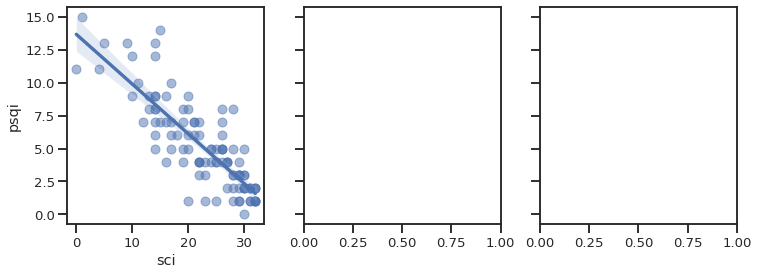

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12,4), sharey=True)
sns.regplot(data=gfmt, x='sci', y='psqi', ax=axs[0], scatter_kws={'alpha': 0.5});
# sns.regplot(data=gfmt, x='psqi', y='acc', ax=axs[1], scatter_kws=dict(alpha=0.5))
# sns.regplot(data=gfmt, x='ess', y='acc', ax=axs[2], scatter_kws=dict(alpha=0.5));